# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue"> Ruhani Faiheem Rahman </font>

# I. Overview

This assignement will help us to learn about the basic of deep neural network with the use of tensorflow framework. In this assignment, we will select three deep neural model to play with our google play store data. We will also discuss what is the reason behind our choice.

# II. Data

## Descryption

We are using Google Play Store Apps data for our classification part. This data contains some information of an app like its Catagory, Rating, Paid or Free, Prices, Total Installs, Genre, Last Updated, Size , Reviews etc. Using this features we can tell the Type of an app that it is Paid or Free. 

This data is created from scraping the google play store website. We collect this from https://www.kaggle.com/lava18/google-play-store-apps. 


## Reading and preprocessing of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
#import pdb; pdb.set_trace()
%matplotlib inline
import seaborn as sns


In [47]:
df = pd.read_csv('googleplaystore1.csv')
#df = df.sample(n=10000)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
Price             10839 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
Price             10839 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [50]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Content Rating                     Genres  \
0     159   19M      10,000+  Free       Everyone               Art & Design   
1     967   14M     500,000+  Free       Everyone  Art & Design;Pretend Play   
2   87510  8.7M   5,000,000+  Free       Everyone               Art & Design   
3  215644   25M  50,000,000+  Free           Teen               Art & Design   
4     967  2.8M     100,000+  Free       Everyone    Art & Design;Creativity   

  Last Updated         Current Ver   Android Ver Price  
0     7-Jan-18               1.0.0  4.0.3 and up     0  
1    15-Jan-18               2.0.0  4.0.3 and up     0  
2     1-Aug-18               1.2.4  4.0.3 and up     0  
3     8-Jun-18  Varies with device    4.2 and up     0  
4    20-Jun-18                 1.1    4.4 and up     0

In [51]:
np.any(df.isnull())

True

In [52]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [53]:

def convertToInt(df, column_name):
    labels = df.loc[:,column_name].unique().tolist()
    maps = dict(zip(labels,range(len(labels))))
    df[column_name] = df[column_name].apply(lambda x: maps[x])
    return maps;

def fillNullToZero(df, column_name):
    df[column_name].fillna(value=0.0, inplace=True)
    
def convertToInt_(df, column_name):
    labels = df.loc[:,column_name].unique().tolist()
    maps = dict(zip(labels,labels))
    df[column_name] = df[column_name].apply(lambda x: maps[x])
    return maps;

In [54]:
for column in df.columns.values:
    fillNullToZero(df,column)
print(df.info())
print(np.any(df.isnull()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
Price             10841 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
False


In [55]:
df.columns.values

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price'], dtype=object)

In [56]:
# App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver
#these features need to convert in integer.


if df.dtypes['App'] == 'object':
    app_maps = convertToInt(df,'App')

if df.dtypes['Category'] == 'object':
    category_maps = convertToInt(df,'Category')
    
if df.dtypes['Reviews'] == 'object':
    reviews_maps = convertToInt(df,'Reviews')

if df.dtypes['Size'] == 'object':
    size_maps = convertToInt(df,'Size')

if df.dtypes['Installs'] == 'object':
    installs_maps = convertToInt(df,'Installs')

if df.dtypes['Type'] == 'object':
    type_maps = convertToInt(df,'Type')

if df.dtypes['Type'] == 'object':
    type_maps = convertToInt(df,'Type')

    
if df.dtypes['Android Ver'] == 'object':
    android_version_maps = convertToInt(df,'Android Ver')

if df.dtypes['Content Rating'] == 'object':
    android_version_maps = convertToInt(df,'Content Rating')

if df.dtypes['Genres'] == 'object':
    android_version_maps = convertToInt(df,'Genres')

if df.dtypes['Last Updated'] == 'object':
    android_version_maps = convertToInt(df,'Last Updated')

if df.dtypes['Current Ver'] == 'object':
    android_version_maps = convertToInt(df,'Current Ver')



In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null int64
Category          10841 non-null int64
Rating            10841 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null int64
Installs          10841 non-null int64
Type              10841 non-null int64
Content Rating    10841 non-null int64
Genres            10841 non-null int64
Last Updated      10841 non-null int64
Current Ver       10841 non-null int64
Android Ver       10841 non-null int64
Price             10841 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 1.1+ MB


In [58]:
def stringToIntConvert(df, column_name):
    print('Hello')
    i = 0
#    print(df.loc[:,'Price'].unique().tolist())
    for value in df[column_name]:

        new_val = 0.0
        if type(value) is not float:
            if value.startswith('$'):
    #            print(value)
                new_val = float(value[1:])
                print(new_val)
            elif value == "0":
                new_val = 0.00
            else :
                new_val = 0.00
        df.replace({column_name : value},new_val,inplace=True)
        i+=1
        

def printHello():
    print('Hello')
    print(df.loc[:,'Price'].unique().tolist())

In [59]:
stringToIntConvert(df,'Price')

Hello
4.99
3.99
6.99
1.49
2.99
7.99
5.99
3.49
1.99
9.99
7.49
0.99
9.0
5.49
10.0
24.99
11.99
79.99
16.99
14.99
1.0
29.99
12.99
2.49
10.99
1.5
19.99
15.99
33.99
74.99
39.99
3.95
4.49
1.7
8.99
2.0
3.88
25.99
399.99
17.99
400.0
3.02
1.76
4.84
4.77
1.61
2.5
1.59
6.49
1.29
5.0
13.99
299.99
379.99
37.99
18.99
389.99
19.9
8.49
1.75
14.0
4.85
46.99
109.99
154.99
3.08
2.59
4.8
1.96
19.4
3.9
4.59
15.46
3.04
4.29
2.6
3.28
4.6
28.99
2.95
2.9
1.97
200.0
89.99
2.56
30.99
3.61
394.99
1.26
1.2
1.04


In [60]:
if df.dtypes['Price'] == 'object':
    price_maps = convertToInt_(df,'Price')

In [61]:
if df.dtypes['Type'] == 'object':
    price_maps = convertToInt(df,'Type')

In [62]:
df.dtypes['Type']
#price_maps

dtype('int64')

### Visualization

(0, 50)

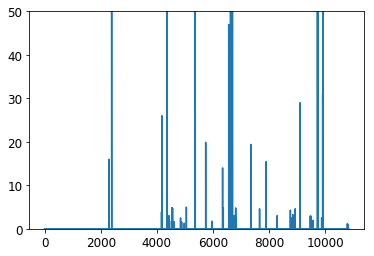

In [90]:
plt.plot(df['Price'])
plt.ylim(0,50)

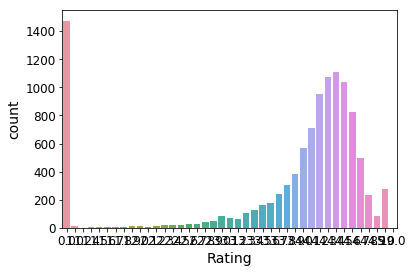

In [91]:
sns.countplot(df['Rating'])

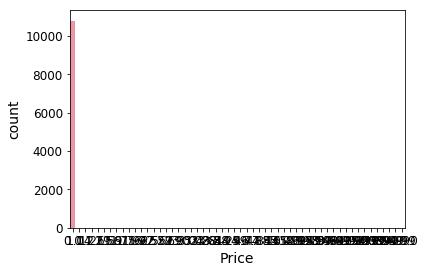

In [93]:
sns.countplot(df['Price'])

In [95]:
XC.shape

(10841, 12)

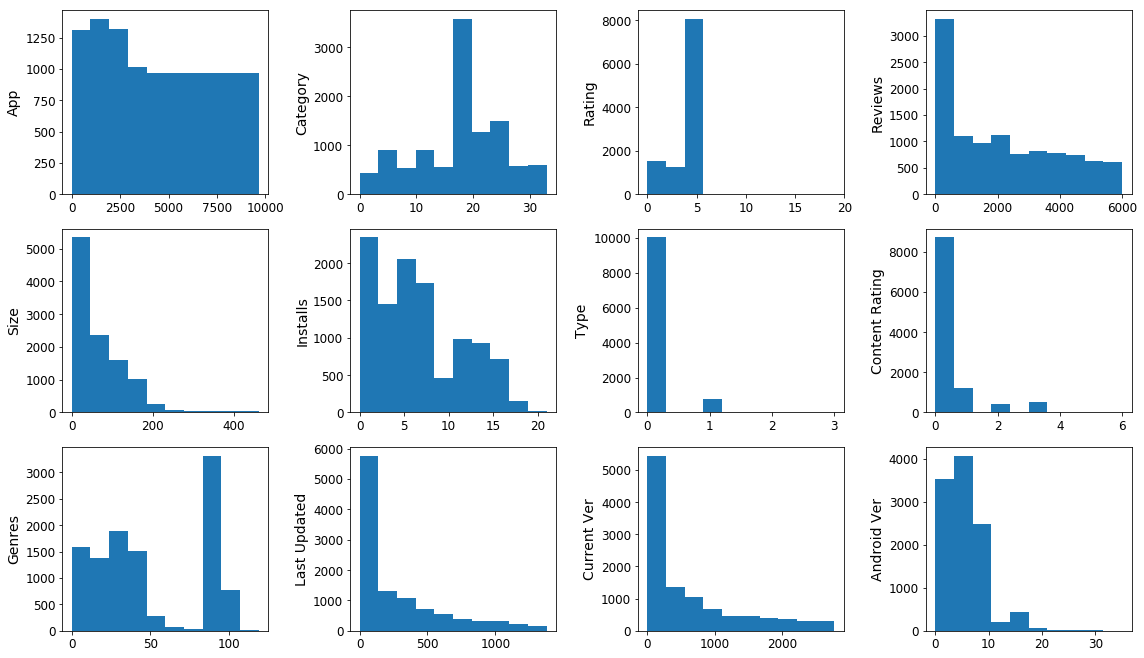

In [98]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.hist(XC.iloc[:, i])
    plt.ylabel(XC.columns.values[i])
fig.tight_layout()

#### Copy Dataframe to X

In [92]:
X = df.iloc[:, :].copy()
X

App  Category  Rating  Reviews  Size  Installs  Type  Content Rating  \
0         0         0     4.1        0     0         0     0               0   
1         1         0     3.9        1     1         1     0               0   
2         2         0     4.7        2     2         2     0               0   
3         3         0     4.5        3     3         3     0               1   
4         4         0     4.3        1     4         4     0               0   
5         5         0     4.4        4     5         5     0               0   
6         6         0     3.8        5     0         5     0               0   
7         7         0     4.1        6     6         6     0               0   
8         8         0     4.4        7     7         6     0               0   
9         9         0     4.7        8     8         0     0               0   
10       10         0     4.4        9     9         6     0               0   
11       11         0     4.4       10    10         6     0               0   
12       12         0     4.2       11    11         7     0               1   
13       13         0     4.6       12    12         4     0               0   
14       14         0     4.4       13    13         4     0               0   
15       15         0     3.2       14    14         8     0               0   
16       16         0     4.7       15    15         1     0               0   
17       17         0     4.5       16    16         0     0               0   
18       18         0     4.3       17    17         2     0               0   
19       19         0     4.6       18    18         7     0               0   
20       20         0     4.0       19     1         4     0               0   
21       21         0     4.1       20    10         4     0               0   
22       22         0     4.7       21    19         1     0               2   
23       23         0     0.0       22    20         4     0               0   
24       24         0     4.7       23    21         5     0               0   
25       25         0     4.8       24    22         0     0               0   
26       26         0     4.7       25     3         1     0               0   
27       27         0     4.1       26    23         4     0               0   
28       28         0     3.9       27    24         0     0               0   
29       29         0     4.1       28    19         4     0               0   
...     ...       ...     ...      ...   ...       ...   ...             ...   
10811  9630         1     0.0      425    51        14     0               0   
10812  9631        18     4.1      472    78        11     0               0   
10813  9632         4     0.0      535    14         0     0               0   
10814  9633        18     4.0     5995    18         5     0               1   
10815  9634         3     4.2     5996    74         1     0               0   
10816  9635         4     0.0      175    80        14     0               0   
10817  9636        25     4.0     5997    35         4     0               0   
10818  9637        11     0.0     1722    92         0     0               0   
10819  9638         3     3.3     3640    42         8     0               1   
10820  9639        18     5.0     1887    44        11     0               1   
10821  9640        18     0.0      530    47        13     0               0   
10822  9641        27     0.0      424     8        16     0               0   
10823  9642        30     0.0      537    52        14     0               0   
10824  9643        19     0.0     2846   183         0     0               0   
10825  9644        20     0.0      820   152        14     0               1   
10826  9645        20     4.0     5998    29         2     0               3   
10827  9646        18     4.2       39    78         8     0               0   
10828  9647         5     3.4     3181    78         0     0               0   
10829  9

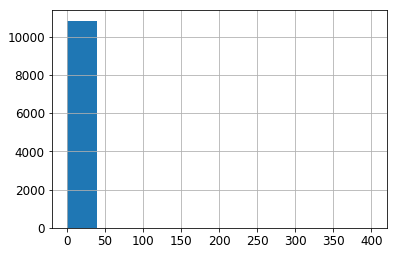

In [99]:
T=X['Price']
XC=X.iloc[:,:-1]
T.hist()

In [68]:
T.describe()

count    10841.000000
mean         0.264200
std          8.589996
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [69]:
XC

App  Category  Rating  Reviews  Size  Installs  Type  Content Rating  \
0         0         0     4.1        0     0         0     0               0   
1         1         0     3.9        1     1         1     0               0   
2         2         0     4.7        2     2         2     0               0   
3         3         0     4.5        3     3         3     0               1   
4         4         0     4.3        1     4         4     0               0   
5         5         0     4.4        4     5         5     0               0   
6         6         0     3.8        5     0         5     0               0   
7         7         0     4.1        6     6         6     0               0   
8         8         0     4.4        7     7         6     0               0   
9         9         0     4.7        8     8         0     0               0   
10       10         0     4.4        9     9         6     0               0   
11       11         0     4.4       10    10         6     0               0   
12       12         0     4.2       11    11         7     0               1   
13       13         0     4.6       12    12         4     0               0   
14       14         0     4.4       13    13         4     0               0   
15       15         0     3.2       14    14         8     0               0   
16       16         0     4.7       15    15         1     0               0   
17       17         0     4.5       16    16         0     0               0   
18       18         0     4.3       17    17         2     0               0   
19       19         0     4.6       18    18         7     0               0   
20       20         0     4.0       19     1         4     0               0   
21       21         0     4.1       20    10         4     0               0   
22       22         0     4.7       21    19         1     0               2   
23       23         0     0.0       22    20         4     0               0   
24       24         0     4.7       23    21         5     0               0   
25       25         0     4.8       24    22         0     0               0   
26       26         0     4.7       25     3         1     0               0   
27       27         0     4.1       26    23         4     0               0   
28       28         0     3.9       27    24         0     0               0   
29       29         0     4.1       28    19         4     0               0   
...     ...       ...     ...      ...   ...       ...   ...             ...   
10811  9630         1     0.0      425    51        14     0               0   
10812  9631        18     4.1      472    78        11     0               0   
10813  9632         4     0.0      535    14         0     0               0   
10814  9633        18     4.0     5995    18         5     0               1   
10815  9634         3     4.2     5996    74         1     0               0   
10816  9635         4     0.0      175    80        14     0               0   
10817  9636        25     4.0     5997    35         4     0               0   
10818  9637        11     0.0     1722    92         0     0               0   
10819  9638         3     3.3     3640    42         8     0               1   
10820  9639        18     5.0     1887    44        11     0               1   
10821  9640        18     0.0      530    47        13     0               0   
10822  9641        27     0.0      424     8        16     0               0   
10823  9642        30     0.0      537    52        14     0               0   
10824  9643        19     0.0     2846   183         0     0               0   
10825  9644        20     0.0      820   152        14     0               1   
10826  9645        20     4.0     5998    29         2     0               3   
10827  9646        18     4.2       39    78         8     0               0   
10828  9647         5     3.4     3181    78         0     0               0   
10829  9

## Primary Obseravtion

We can see that, most of the app has rating more than 4. Another observation is that most of the app is free. And paid apps has range $0 - $100. Few of them crosses the limit of $100


# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



In [114]:
import tensorflow as tf
import numpy as np
import os
import time


In [175]:
epochs = 100
n_hidden=7
n_unit=2
cons=0
batch_size=100
learning_rate=0.01

In [116]:
def selu(z, scale=1.0507009873554804934193349852946, alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [117]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [177]:
def deepNN(X, T, XT, TT):
    reset_graph()
    #input and output place holder
    x = tf.placeholder("float32", shape=[None, X.shape[1]])
    y = tf.placeholder("float32", shape=[None, T.shape[1]])
    #print(T.shape[1])
    #initializes hidden layer


    hidden = {}
    n_hunit = {}
    n_output= 2

    for i in range(n_hidden-1):
        n_hunit[i]=n_unit-cons*(n_hidden-i)
#        print(n_hunit[i])

    #hidden1 = tf.layers.dense(x, n_hunit[i], activation=tf.nn.elu, name="scasc")
    for i in range(n_hidden):
        #print(i)
        if i==0:
            hidden[i] = tf.layers.dense(x, n_hunit[i], activation=selu)
        elif i==n_hidden-1:
            output_layer= tf.layers.dense(hidden[i-1], n_output, activation=selu)
            output_layer=output_layer
        else:
            hidden[i] = tf.layers.dense(hidden[i-1], n_hunit[i], activation=selu)



    ylabels = tf.one_hot(indices=tf.cast(y, tf.int32), depth=2)
    entropy = tf.nn.softmax_cross_entropy_with_logits(labels=ylabels, logits=output_layer)
    loss = tf.reduce_mean(entropy, name="loss")

    #optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)


    #loss function

    predictions=tf.argmax(output_layer, axis=1)
    accuracy_t = tf.metrics.accuracy(labels=y, predictions=predictions)



    init = tf.global_variables_initializer()
    errtrace= []
    acctrace= []
    zf={}
    zl={}
    with tf.Session() as sess:
        init.run()
        tf.local_variables_initializer().run()

        start_training = time.clock()  
        for epoch in range(epochs):
            total=0
            total_cost=0
            num_batch=X.shape[0]/batch_size
            for iteration,offset in enumerate(range(0, X.shape[0],batch_size)):
                x_batch, y_batch= X[offset: offset + batch_size], T[offset: offset + batch_size]

                _, cost, ylabel, zf, zl= sess.run([training_op,loss,ylabels,hidden[0],hidden[n_hidden-2]], {x: x_batch, y: y_batch})
                acc_train = sess.run([accuracy_t],{x: x_batch, y: y_batch})

                total+=acc_train[0][1]
                total_cost+=cost

            mean_accuracy=total/num_batch
            mean_cost=total_cost/num_batch
            if epoch % 2 == 0:
                errtrace.append(mean_cost)
                acctrace.append(mean_accuracy)
        trainingtime= time.clock()-start_training
        #print(zf.shape)
        acc_test = sess.run([accuracy_t],feed_dict= {x: XT, y: TT})[0][1]
        print("Time for Training : {}".format(trainingtime))

        print("Test Accuracy : {} %".format(acc_test*100))

        plot_graph(errtrace,acctrace,zf,zl)

        

In [178]:
def plot_graph(errtrace,acctrace,zf,zl):    
    plt.figure(figsize=(20,5))

    plt.plot(errtrace)
    plt.xlabel('Epochs')
    plt.ylabel('Error')


    plt.figure(figsize=(20,5))
    plt.plot(acctrace)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy');

    plt.figure(figsize=(20,5))
    for k in range(zf.shape[1]):
        plt.plot(zf[:100, k])

    plt.xlabel('$x$')
    plt.ylabel('First Hidden layer Outputs ($z$)')

    plt.figure(figsize=(20,5))
    for k in range(zl.shape[1]):
        plt.plot(zl[:100, k])

    plt.xlabel('$x$')
    plt.ylabel('Last Hidden layer Outputs ($z$)')

In [138]:
def init(batch_size=100, learning_rate=0.01, n_epochs=100, n_hidden=6, n_unit=2, cons=0):
    epochs=n_epochs
    n_hidden=n_hidden+1
    n_unit=n_unit
    cons=cons
    batch_size=batch_size
    learning_rate=learning_rate
    return epochs, n_hidden, n_unit, cons, batch_size, learning_rate

In [149]:
#partition of data

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [150]:
Xlst, Tlst = partition(pd.DataFrame(XC), pd.DataFrame(T))

### Explanation of codes

We use tensorflow framework to implement deep neural network. For partition the data we use 80% for training and other 20% for testing using 'partition' method. We have define some variable epochs, number of hidden unit as n_hidden, number of output unit as n_unit, batch_size indecates number of data to process in each bach and learning_rate indicates the learning rate of the model.

Each time when we run the deepNN method we call reset graph to get simmilar scale output for all the model. To create hidden layer, we use tf.layers.dense method. tf.nn.softmax_cross_entropy_with_logits method is used to make the classifier as free or not free. Here we use softmax regression. We process the training data as a batch size of 100. 

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

## Neural Network : 01

In [151]:
# preparation

import tensorflow as tf

import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [172]:
XC.shape

(10841, 12)

### Neural Network Structures and Reason for the Selection

For the first model, I choose the minimum number of hidden layer rquires for this assignments. So I choose 6 hiddent layers and 1 hidden layer of perceptron. My data has 12 features and the output is the the is free or not. So, its a classification problem. 

Choosing the minimum number of requried hidden layer will help me to understand the impact the minimum number of hidden layer. So, I can understand the performance using the less number of hidden layer.

### Explanation of Code of this Deep Neural Net

Here, we initialize the neural net by calling init method with batch_size = 100 , learning rate = 0.01, number of epochs = 100, number of hidden layer = 6, number of perceptron in each hidden layer = 1.

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Time for Training : 10.141216445317696
Test Accuracy : 99.52718019485474 %


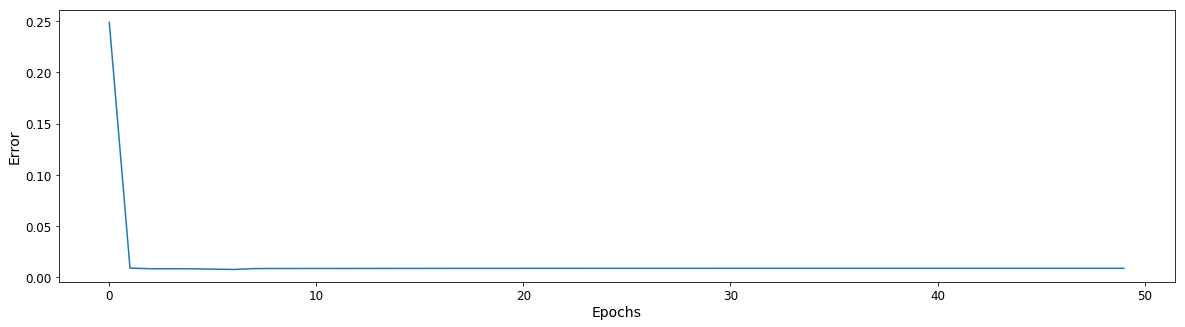

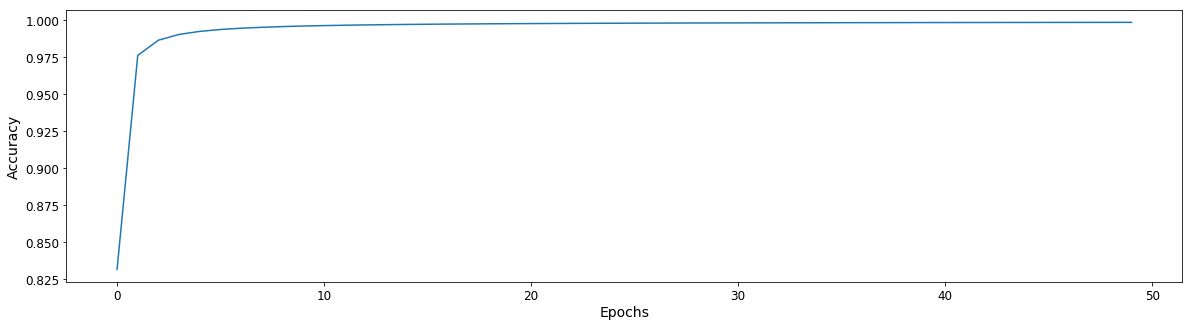

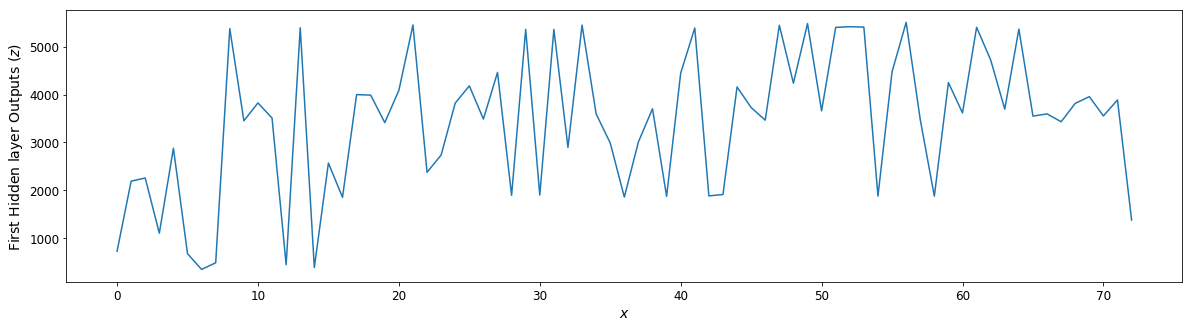

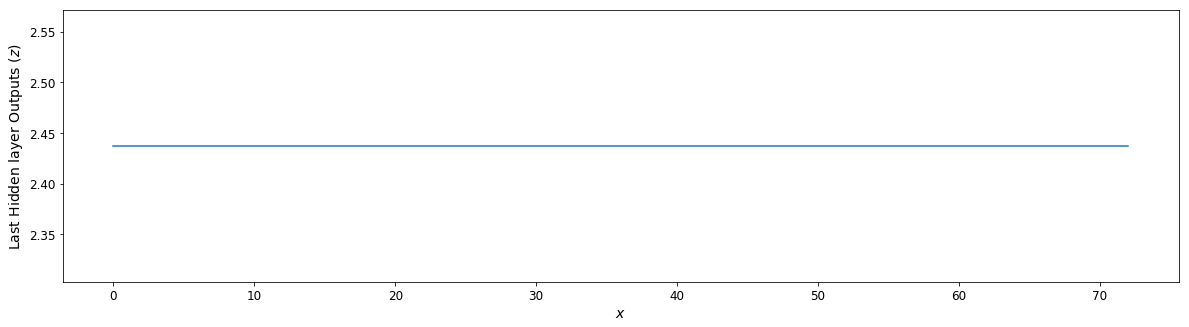

In [179]:
epochs, n_hidden, n_unit, cons, batch_size, learning_rate = init(100, 0.01, 100, 6, 1, 0)
deepNN(Xlst[0].as_matrix(),Tlst[0].as_matrix(),Xlst[1].as_matrix(),Tlst[1].as_matrix())

Using less hidden layer I got 99.5% accuracy.

## Neural Network : 02

### Neural Network Structures and Reason for the Selection

For the second model, I choose slightly higher number of hidden layer and hidden perceptron layer. I choose number of hidden layer to 11 and number of perceptron hidden layer to 13. 

The reason for choosing this model is that I want to visualize what more number of hidden layer actually do. Because I already get 99.5 % accuracy using the minimum number of hidden layer. So, how much more benefit does more layer provides, let's see the here.

### Explanation of Code of this Deep Neural Net

Here, we initialize the neural net by calling init method with batch_size = 100 , learning rate = 0.01, number of epochs = 100, number of hidden layer = 11, number of perceptron in each hidden layer = 13.

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Time for Training : 23.96677362279297
Test Accuracy : 99.56766963005066 %


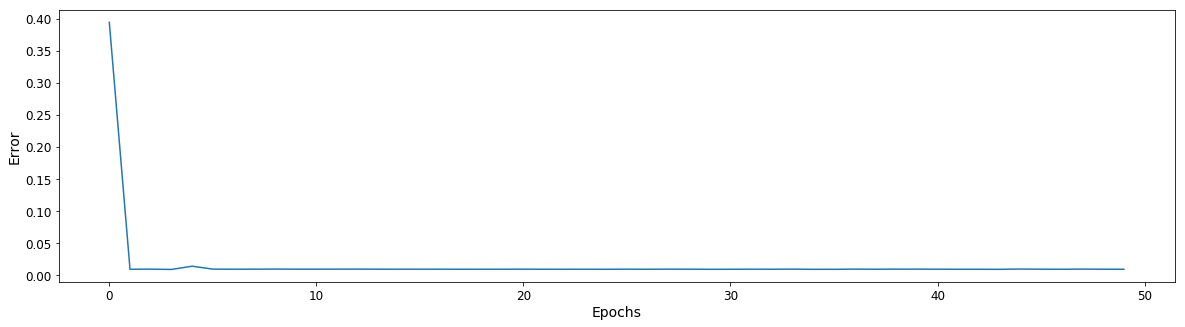

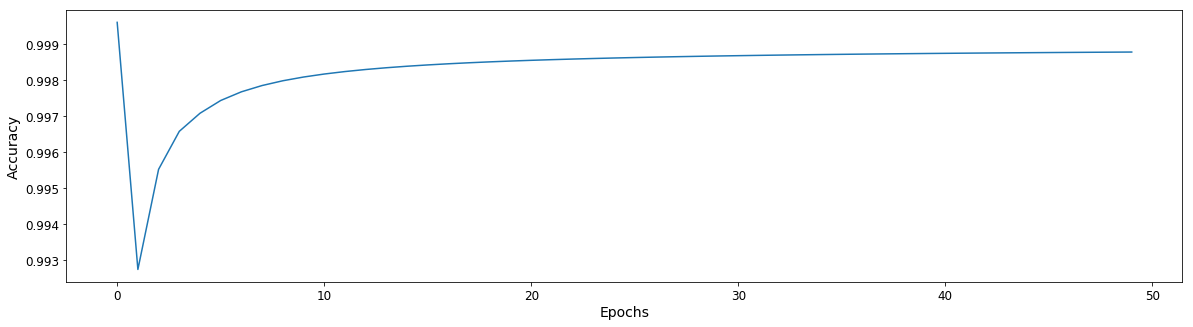

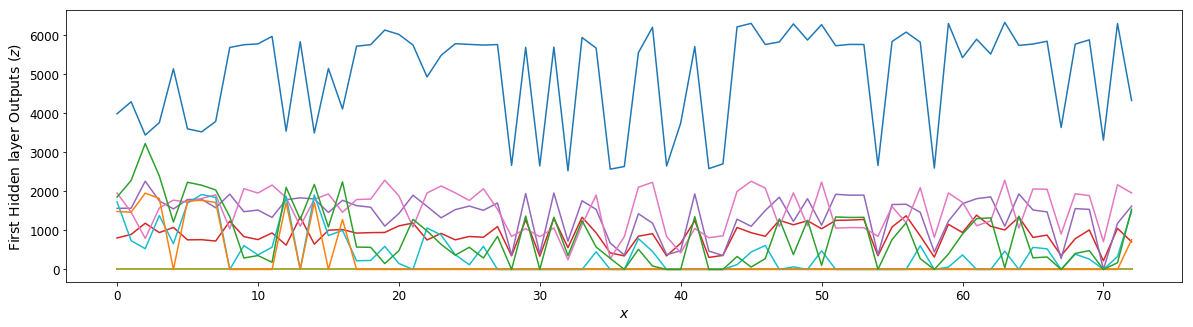

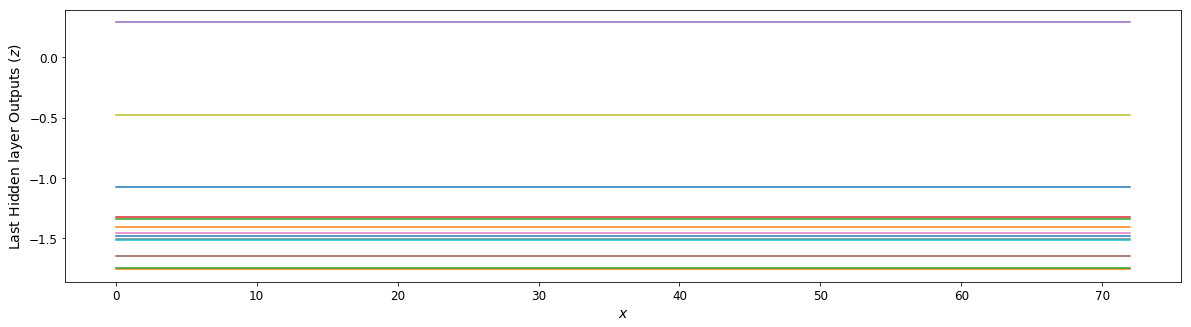

In [180]:
epochs, n_hidden, n_unit, cons, batch_size, learning_rate = init(100, 0.01, 100, 11, 13, 0)
deepNN(Xlst[0].as_matrix(),Tlst[0].as_matrix(),Xlst[1].as_matrix(),Tlst[1].as_matrix())

This more number of hidden layer slighly improves the accuracy. But this is not worth it, I think.

## Neural Network : 03

### Neural Network Structures and Reason for the Selection

For the last part of the assignment, I choose CNN to see how it works in this data set. Because CNN generally use for image classification. But this dataset is different from an image. So, here i use 10 hidden unit and 25 hidden percentron unit with a increase of percentron number by 2 in each hidden layer.



### Explanation of Code of this Deep Neural Net

Here, we initialize the neural net by calling init method with batch_size = 100 , learning rate = 0.01, number of epochs = 100, number of hidden layer = 10, number of perceptron in each hidden layer = 25 and number of perceptrons increased by 2 in each layer.

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Time for Training : 18.6784610400573
Test Accuracy : 99.56122636795044 %


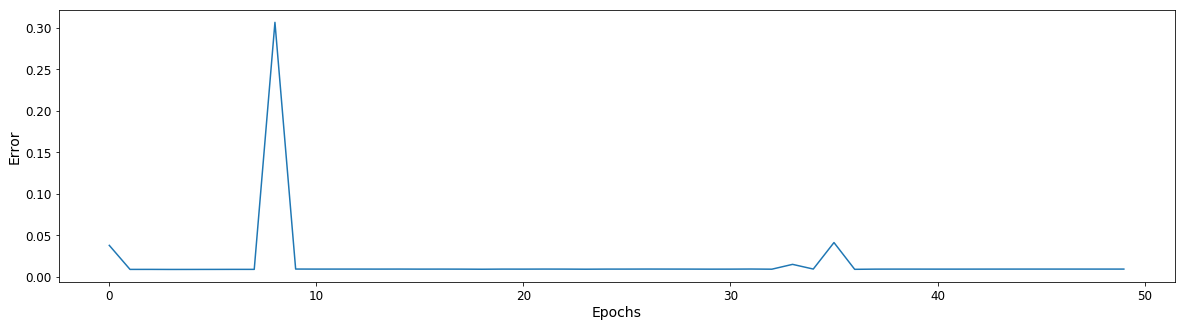

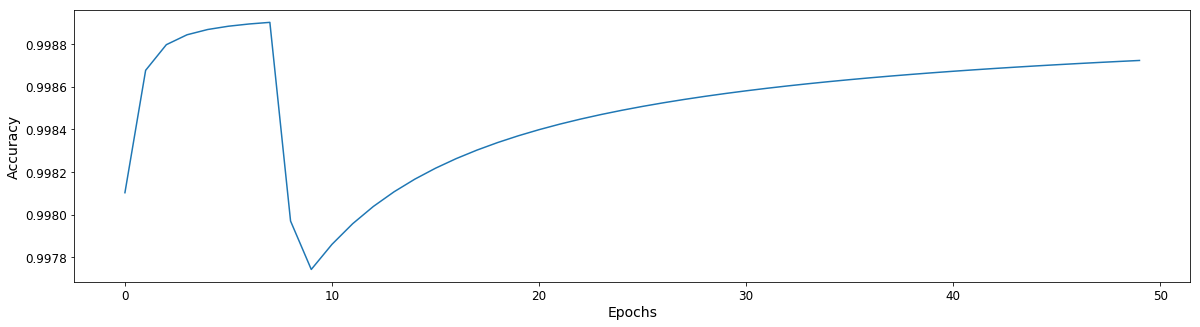

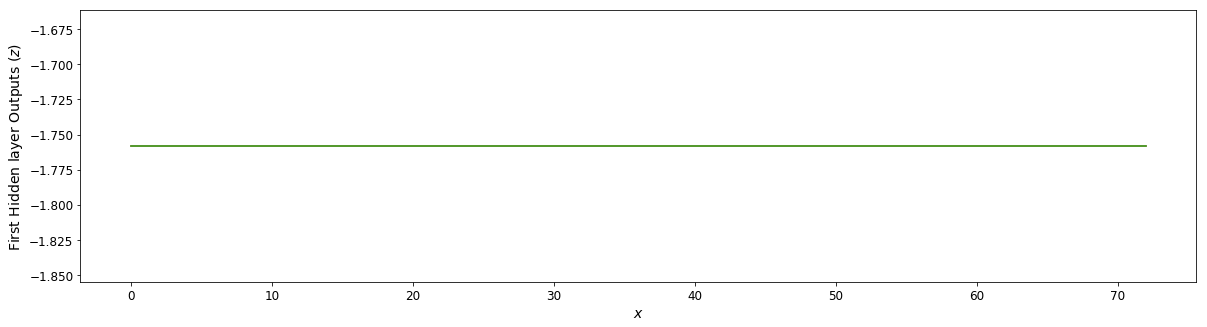

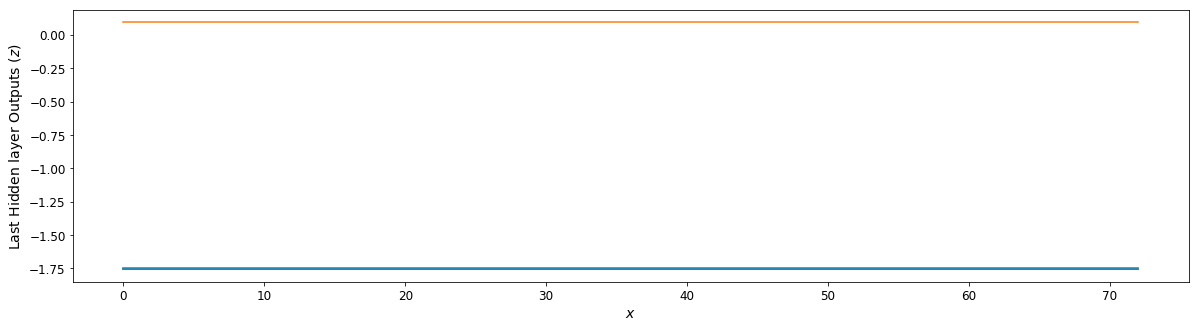

In [182]:
epochs, n_hidden, n_unit, cons, batch_size, learning_rate = init(100, 0.01, 100, 10, 25, 2)
deepNN(Xlst[0].as_matrix(),Tlst[0].as_matrix(),Xlst[1].as_matrix(),Tlst[1].as_matrix())

### Explanation of experimental codes

For the experimental code, we use the moons plot from sklearn.datasets and run our deen neural net. I use the first model for testing here. We have 1000 moons data with 5% of noise.

Text(0.5, 1.0, 'Scatter Dataset')

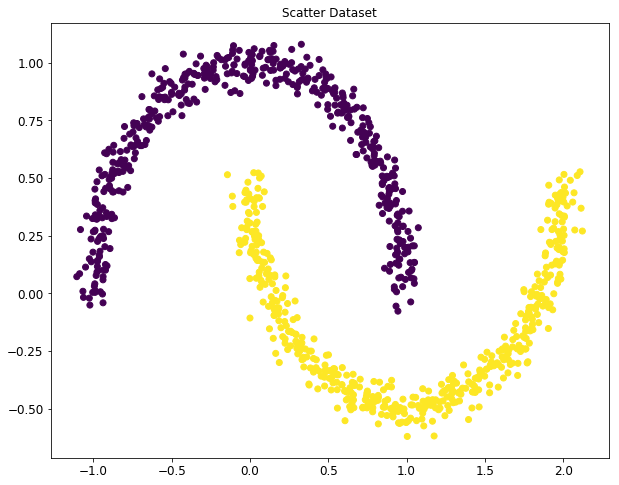

In [189]:
# Data for testing
from sklearn.datasets import make_moons

Xp, Tp = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(10, 8))
plt.scatter(Xp[:, 0], Xp[:, 1], marker='o', c=Tp)
plt.title("Scatter Dataset")


In [169]:
Xpre, Tpre = partition(pd.DataFrame(Xp), pd.DataFrame(Tp))

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1
1
1
1
1
1
Time for Training : 48.633849839035975
Test Accuracy : 87.47880458831787 %


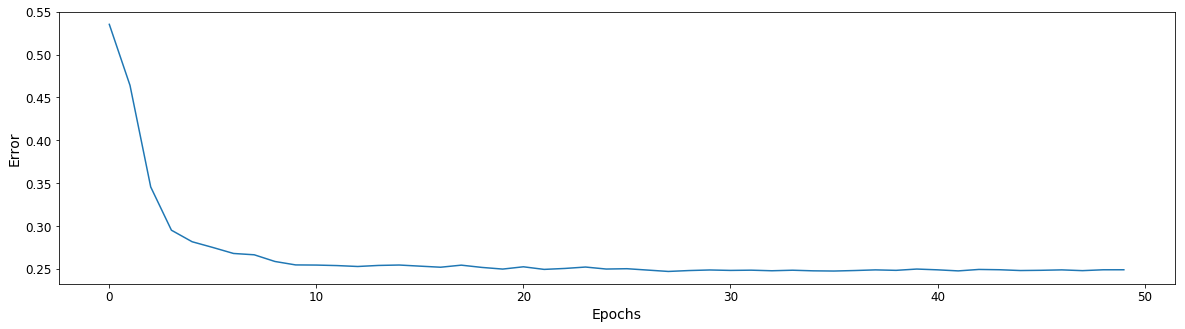

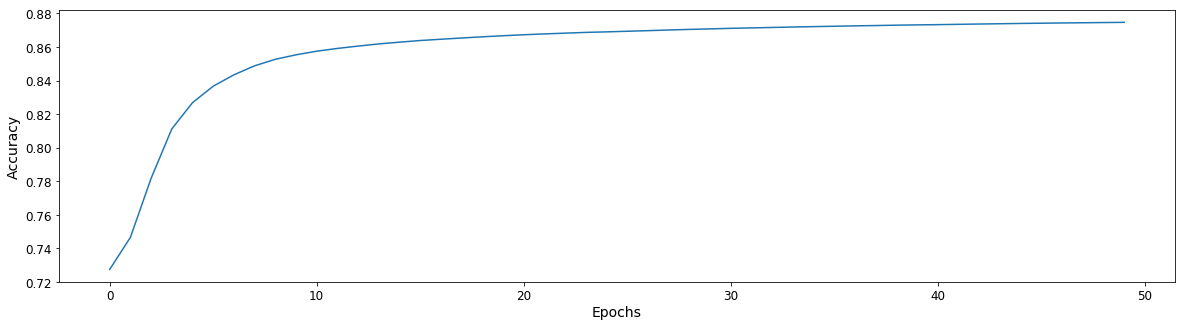

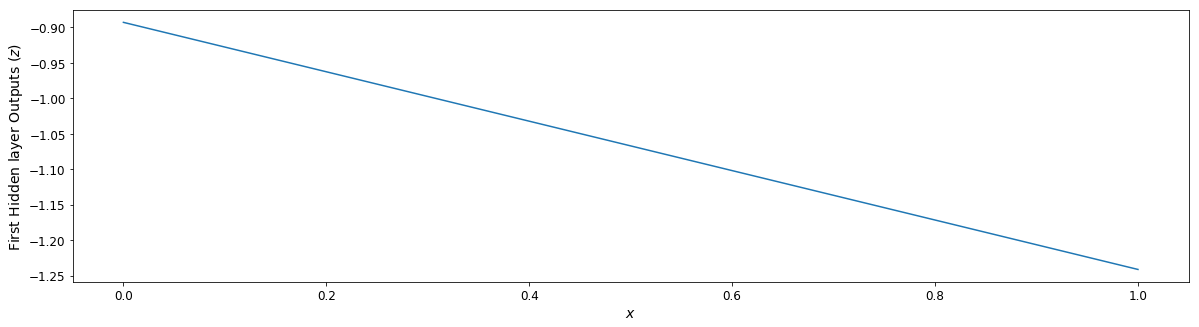

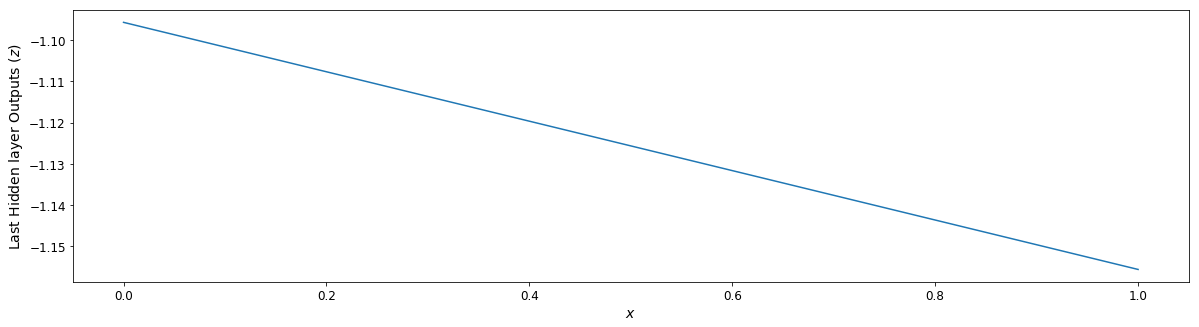

In [170]:
epochs, n_hidden, n_unit, cons, batch_size, learning_rate = init(2, 0.01, 100, 6, 1, 0)
deepNN(Xpre[0].as_matrix(),Tpre[0].as_matrix(),Xpre[1].as_matrix(),Tpre[1].as_matrix())

## Discussions about the choice of network structures

Finding the right model for your data is very difficult task. But deep neural network works fine if we add more number of layers. Our first model took only 10 seconds to run and the accuracy is 99.5%. which is enough i think. For the 2nd model it took longer time to run and the output is almost same as the 1st model. So, there is no need to add more layers if your data is straight forward. 2nd model took more than 20 seconds to run. 3rd model also performs similar with a less time than the 2nd model. For my case 1st model is the best.

Another observation is that adding more layers and the graph of the first hidden layer output indicates that, the initial model is learning at first. Because there is a lot of transition in the graph. On the oter hand if the hidden layer of the final output is pretty muc straight forward. which means that the model is already learnt. So, most of the learning happens in the first few hidden layers, I think.

For the experimental data which has 5% noise performed less with respect to our dataset. I got 87% accuracy there.

# Conclusions

Here is the thing, When I use this dataset to classification problem, I use only one or two features as training. But here I use all the features and get the tensorflow to learn from the model. And I got more than 99% accuracy in each of the model which is much better than the classification model. So, I think that deep neural model is way better in machine learning approach.



# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 

# References

1. Gupta, L. (2018, Sep 18). Google Play Store Apps. Retrieved January 28, 2019, from https://www.kaggle.com/lava18/google-play-store-apps
2. Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
3.  Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb
4. Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
